### Supp Figure 3B

In [1]:
## import statement

import matplotlib
from matplotlib import pyplot as plt
import seaborn
import scanpy
import pandas
from typing import Tuple, Any, List, Union
import numpy as np
import torch
import os
from anndata import read_h5ad
from scanpy import pp
import pandas as pd
import umap
import scanpy as sc
# import cna

# tissuemosaic import
import tissuemosaic as tp

In [2]:
from tissuemosaic.utils import *
from tissuemosaic.plots import *
from tissuemosaic.models.patch_analyzer import SpatialAutocorrelation, Composition
from tissuemosaic.data.dataset import MetadataCropperDataset

[neptune] [warning] NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.


In [3]:
## pytorch

torch.cuda.set_device(0)
torch.set_default_tensor_type(torch.FloatTensor)

/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025845868/work/torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


In [4]:
## Make plots directory if it doesn't already exist
try:
    os.mkdir("./plots")
except:
    pass

In [5]:
## plotting parameters

linewidth = 5
tickfontsize = 70
labelfontsize = 70
labelpad = 40
titlefontsize=70
legendfontsize=70
legendmarkersize=4

In [6]:
## path names

anndata_dest_folder=os.path.abspath('../TissueMosaic_data/thymus_anndata/')

# Make a list of all the h5ad files in the annotated_anndata_dest_folder
fname_list = []
for f in os.listdir(anndata_dest_folder):
    if f.endswith('.h5ad'):
        fname_list.append(f)
print(fname_list)

['thymus_week_7.2.h5ad', 'thymus_week_4.3.h5ad', 'thymus_day_2.2.h5ad', 'thymus_day_7.2.h5ad', 'thymus_week_3.2.h5ad', 'thymus_week_68.3.h5ad', 'thymus_day_4.2.h5ad', 'thymus_day_0.1.h5ad', 'thymus_day_1.2.h5ad', 'thymus_day_1.1.h5ad', 'thymus_week_68.1.h5ad', 'thymus_day_3.2.h5ad', 'thymus_day_3.1.h5ad', 'thymus_week_90.1.h5ad', 'thymus_week_9.2.h5ad', 'thymus_week_9.1.h5ad', 'thymus_week_15.2.h5ad', 'thymus_day_3.3.h5ad', 'thymus_week_28.2.h5ad', 'thymus_week_68.2.h5ad', 'thymus_week_32.3.h5ad', 'thymus_week_13.1.h5ad', 'thymus_day_2.1.h5ad', 'thymus_week_5.2.h5ad', 'thymus_day_7.1.h5ad', 'thymus_week_32.1.h5ad', 'thymus_day_4.1.h5ad', 'thymus_week_28.1.h5ad', 'thymus_day_10.1.h5ad', 'thymus_week_48.1.h5ad', 'thymus_week_5.3.h5ad', 'thymus_week_4.2.h5ad', 'thymus_week_90.2.h5ad', 'thymus_week_7.1.h5ad', 'thymus_week_32.2.h5ad', 'thymus_day_10.2.h5ad', 'thymus_day_5.2.h5ad', 'thymus_week_15.1.h5ad', 'thymus_day_2.3.h5ad', 'thymus_week_3.1.h5ad', 'thymus_day_5.1.h5ad', 'thymus_week_48.

In [7]:
# ## Input Model


# all_ckpts = ["dino_thymus_dm_best_ckpt.pt"]

# all_models = ["dino"]
# all_ckpts_dest = []
# for ckpt in all_ckpts:
#     ckpt_dest = os.path.join("/home/skambha6/chenlab/tissuemosaic/model_checkpoints/testis/", ckpt)
#     all_ckpts_dest.append(ckpt_dest)
    
# print(all_ckpts_dest)

In [8]:
# compute_regress_features = True

In [9]:
# ## Collect Sparse Images and features dict

# anndata_list = []
# from tissuemosaic.data import AnndataFolderDM
# from tissuemosaic.models.ssl_models import *

# all_features_dict = {}

# for ckpt_path, model_name in zip(all_ckpts_dest, all_models):
    
#     print("----------")
#     print("Model --->", model_name, ckpt_path)
#     print("----------")
    
#     # load the model from checkpoint
#     if model_name == "barlow":
#         model = tp.models.ssl_models.Barlow.load_from_checkpoint(checkpoint_path=ckpt_path, strict=False)
#     elif model_name == "simclr":
#         model = tp.models.ssl_models.Simclr.load_from_checkpoint(checkpoint_path=ckpt_path, strict=False)
#     elif model_name == "dino":
#         model = tp.models.ssl_models.Dino.load_from_checkpoint(checkpoint_path=ckpt_path, strict=False)
#     elif model_name == "vae":
#         model = tp.models.ssl_models.Vae.load_from_checkpoint(checkpoint_path=ckpt_path, strict=False)
#     else:
#         raise Exception("Model name not recongnized {}".format(model_name))
        
#     # create the datamodule associated with the pretrained model
#     dm = tp.data.AnndataFolderDM(**model._hparams) 
    
#     # put the model on GPU if available
#     if torch.cuda.is_available():
#         model = model.cuda()
        
#     sp_images = []
#     list_of_dict = []
    
#     for i in range(len(fname_list)):
        
#         fname = fname_list[i]
        
#         # open adata and convert to sparse_image
#         adata_path = os.path.join(anndata_dest_folder, fname)
#         adata = read_h5ad(adata_path)
        
#         # print(adata)
        
#         anndata_list.append(adata)
        
#         sp_img = dm.anndata_to_sparseimage(adata)
        
        
#         #compute ncv with different k
#         for k in [100]:
#             ncv = sp_img.compute_ncv(feature_name="ncv_k{}".format(k), k=k)
          
#         # put sparse image on GPU if available
#         if torch.cuda.is_available():
#             sp_img = sp_img.cuda()
            
#         # compute the patch-feature (internally it crops sparse image and feed crops to pretrained model)
#         patches = sp_img.compute_patch_features(
#             feature_name=model_name, 
#             datamodule=dm, 
#             model=model, 
#             batch_size=64,
#             strategy = 'tiling',
#             fraction_patch_overlap = 0.75,
#             n_patches_max = 1000,
#             overwrite=True,
#             return_crops = True,
#             apply_transform=True,
#             # border_off=True,
#             remove_overlap = False)
        
#         new_dict = sp_img._patch_properties_dict
#         new_dict['classify_tissue_label'] = np.repeat(i, patches.shape[0]) ## check .shape[0] vs .shape[1]
            
#         ## add 1 since day 0 is an age
#         new_dict['regress_condition'] = np.repeat(np.log(adata.obs['Age'][0]+1), patches.shape[0])
#         ## assert dino_patch_xywh = ncv_patch_xywh
        
        
#         cortex_medulla_subset = sp_img.get_spot_dictionary_subset_patch(patch_key = model_name, spot_keys=['cortex_medulla'])
        
        
#         cortex_props = []
#         medulla_props = []
#         for i,patch in enumerate(patches):
#             patch_cm = cortex_medulla_subset['spot_subset_patch_dict'][i]['cortex_medulla']
#             cortex_prop = patch_cm.count('cortex')/len(patch_cm)
#             medulla_prop = patch_cm.count('medulla')/len(patch_cm)
            
#             cortex_props.append(cortex_prop)
#             medulla_props.append(medulla_prop)
            
#         new_dict['cortex_proportion'] = cortex_props
#         new_dict['medulla_proportion'] = medulla_props
        
        
#         ## Compute regress features 
#         if compute_regress_features:
#             loc_x_tmp = sp_img._patch_properties_dict[model_name + '_patch_xywh'][:,0]
#             loc_y_tmp = sp_img._patch_properties_dict[model_name + '_patch_xywh'][:,1]

#             ## take max moran score
#             #morans = [dm.compute_moran(sparse_tensor.to_sparse()).max().item() for sparse_tensor in patches]

#             list_morans = [dm.compute_moran(sparse_tensor.to_sparse()) for sparse_tensor in patches]
#             statuses = [sp_img._sample_status for sparse_tensor in patches] ## replicate instead; same status for all patches in this sp img
#             list_composition = Composition(return_fraction=True)(patches)
#             metadatas = [MetadataCropperDataset(f_name=fname, loc_x=loc_x, loc_y=loc_y, moran=moran, sample_status=status, composition=composition) for
#                      loc_x, loc_y, moran, status, composition in zip(loc_x_tmp, loc_y_tmp, list_morans, statuses,list_composition)] 


#             dict_regress = concatenate_list_of_dict([dm.get_metadata_to_regress(metadata)
#                                                  for metadata in metadatas])
        
#             new_dict.update(dict_regress)
        
#         sp_images.append(sp_img.cpu())
#         list_of_dict.append(new_dict)
        
       
        
#         # free memory by erasing the sparse_image
#         del sp_img
    
#     model_features_dict = concatenate_list_of_dict(list_of_dict)   
#     all_features_dict.update(model_features_dict) 
    
#     # after loop over anndata erase the model and free memory
#     del model
    
# print("Finished")

### Plot UMAPs

In [10]:
from tissuemosaic.utils.validation_util import SmartPca, SmartUmap, SmartLeiden
# all_features_dict.keys()

In [11]:
# ## Compute UMAP and clusters

# feature_keys = [model_name, 'patch_ncv']

# for key in feature_keys:
    
#     if key == 'patch_ncv':
#         smart_pca = SmartPca(preprocess_strategy='z_score')
#         smart_umap = SmartUmap(n_neighbors=5000, preprocess_strategy='z_score', n_components=2, min_dist=0.5, metric='cosine')
        
#         input_features = all_features_dict[key]
#         embeddings_pca = smart_pca.fit_transform(input_features, n_components=0.9)
#         embeddings_umap = smart_umap.fit_transform(input_features)
#     else:
#         smart_pca = SmartPca(preprocess_strategy='z_score')
#         smart_umap = SmartUmap(n_neighbors=5000, preprocess_strategy='raw', n_components=2, min_dist=0.5, metric='euclidean')
                
#         input_features = all_features_dict[key]
#         embeddings_pca = smart_pca.fit_transform(input_features, n_components=0.9)
#         embeddings_umap = smart_umap.fit_transform(embeddings_pca)
        
#     all_features_dict["pca_"+key] = torch.from_numpy(embeddings_pca)
#     all_features_dict["umap_"+key] = torch.from_numpy(embeddings_umap)
#     all_features_dict["umap_graph_"+key] = smart_umap.get_graph()
    
#     umap_graph = smart_umap.get_graph()
#     smart_leiden = SmartLeiden(graph=umap_graph)

#     for res in [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.55, 0.6, 0.65]:
#         leiden_clusters = smart_leiden.cluster(resolution=res, partition_type='RBC')
#         all_features_dict["leiden_feature_" + key + "_" +str(res)] = leiden_clusters
#         all_features_dict["leiden_feature_" + key + "_res_"+str(res)+"_one_hot"] = torch.nn.functional.one_hot(torch.from_numpy(leiden_clusters).long())  # need to make it one-hot so that I can average 

In [12]:
# import pickle
# pickle.dump(open("thymus_features.pkl", 'wb'))

In [13]:
import pickle
all_features_dict = pickle.load(open("../pkls/Supp_Figure3/all_features_dict_umap_thymus.pickle", 'rb'))

/tmp/ipykernel_4024859/2673687183.py:2: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  all_features_dict = pickle.load(open("../pkls/Supp_Figure3/all_features_dict_umap_thymus.pickle", 'rb'))


In [14]:
model_name = "dino"
feature_keys = [model_name]

In [15]:
from anndata import AnnData
import pandas as pd
from scanpy.plotting import embedding
import numpy
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
from typing import List


def plot_embeddings_new(
        input_dictionary: dict,
        embedding_key: str,
        annotation_keys: List[str],
        sup_title: str = None,
        n_col: int = 3,
        cmap: Colormap = 'inferno',
        num_categorical: int = 10,
        **kwargs):
    """
    Takes a dictionary with embeddings and multiple annotations and make a multi-panel figure with each panel showing
    one annotation.

    Args:
        input_dictionary: dictionary with input data
        embedding_key: str corresponding to the embeddings in input_dictionary.
            Embedding have shape (n_sample, latent_dim). Only the first two latent dimensions will be used for plotting.
        annotation_keys: List[str] corresponding to annotations in input_dictionary.
        sup_title: the title (if any) for the figure
        n_col: how many columns to have in the multi-panel figure
        cmap: the color map to use for the continuous variable. The categorical variable will have a different cmap.

    Returns:
        fig: multi-panel figure with the embeddings
    """

    assert set(annotation_keys + [embedding_key]).issubset(input_dictionary.keys()), \
        "Either embeddings or annotation keys are missing from the input dictionary"

    def _is_categorical(_x) -> bool:
        is_float = (
                isinstance(_x[0], float) or
                isinstance(_x[0], numpy.float16) or
                isinstance(_x[0], numpy.float32) or
                isinstance(_x[0], numpy.float64)
        )
        is_many = (_x.shape[0] > num_categorical) ## change this to a parameter
        is_continuous = (is_many and is_float)
        is_categorical = not is_continuous
        return is_categorical

    # make a copy of the dict with the torch to numpy conversion
    cloned_dict = {}
    for k, v in input_dictionary.items():
        if isinstance(v, torch.Tensor):
            cloned_dict[k] = v.detach().cpu().numpy()
        elif isinstance(v, list):
            cloned_dict[k] = numpy.array(v)
        elif isinstance(v, numpy.ndarray):
            cloned_dict[k] = v

    # create dataframe with annotations
    df = pd.DataFrame(cloned_dict, columns=annotation_keys)
    for k in annotation_keys:
        vec = numpy.unique(df[k].to_numpy())
        if _is_categorical(vec):
            df[k] = df[k].astype("category")

    # create anndata with annotations and embeddings
    adata = AnnData(obs=df)
    
    adata.obsm[embedding_key] = cloned_dict[embedding_key]

    # leverage anndata embedding capabilities
    embedding(adata,
                    basis=embedding_key,
                    color=annotation_keys,
                    return_fig=False,
                    show=False,
                    ncols=n_col,
                    cmap=cmap,
                    **kwargs)
    # if sup_title:
    #     _ = fig.suptitle(sup_title)

    # # # close figure and return
    # plt.close(emb_fig)
    # return emb_fig

In [16]:
all_features_dict.keys()

dict_keys(['dino', 'dino_patch_xywh', 'patch_ncv', 'patch_ncv_patch_xywh', 'classify_tissue_label', 'regress_condition', 'cortex_proportion', 'medulla_proportion', 'loc_x', 'loc_y', 'moran_ch_0', 'moran_ch_1', 'moran_ch_2', 'moran_ch_3', 'moran_ch_4', 'moran_ch_5', 'moran_ch_6', 'moran_ch_7', 'moran_ch_8', 'moran', 'ch_0', 'ch_1', 'ch_2', 'ch_3', 'ch_4', 'ch_5', 'ch_6', 'ch_7', 'ch_8', 'pca_dino', 'umap_dino', 'umap_graph_dino', 'leiden_feature_dino_0.02', 'leiden_feature_dino_res_0.02_one_hot', 'leiden_feature_dino_0.05', 'leiden_feature_dino_res_0.05_one_hot', 'leiden_feature_dino_0.1', 'leiden_feature_dino_res_0.1_one_hot', 'leiden_feature_dino_0.15', 'leiden_feature_dino_res_0.15_one_hot', 'leiden_feature_dino_0.2', 'leiden_feature_dino_res_0.2_one_hot', 'leiden_feature_dino_0.4', 'leiden_feature_dino_res_0.4_one_hot'])

/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dino
umap_dino
regress_condition
umap_dino
cortex_proportion


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


umap_dino
medulla_proportion


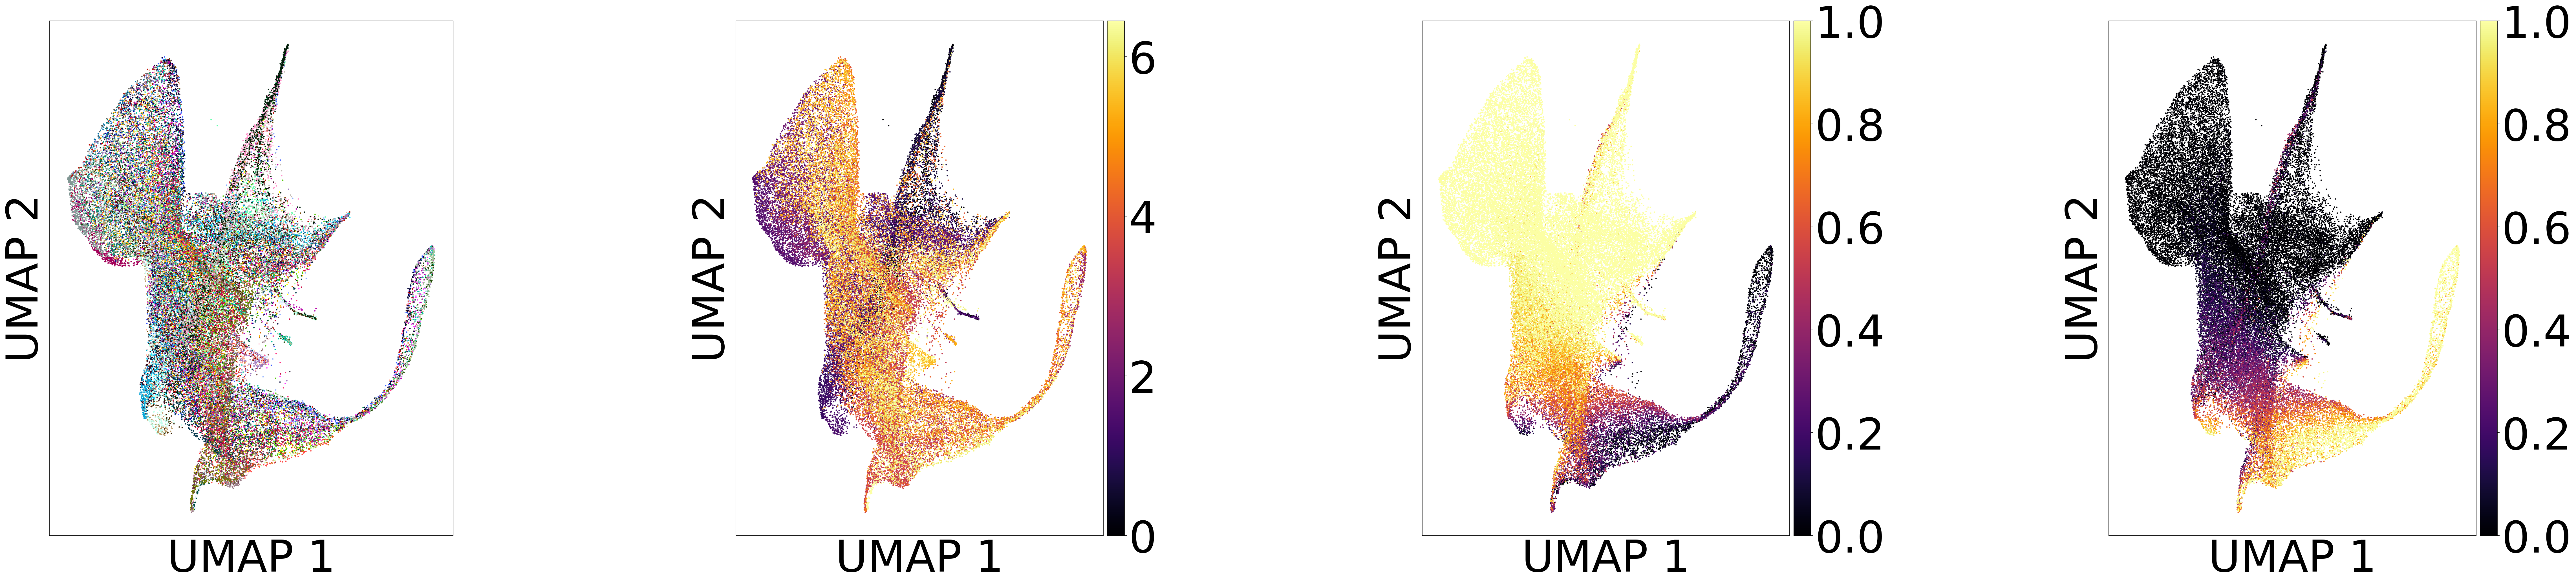

In [19]:
s = 20

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from matplotlib.colorbar import Colorbar

sc.set_figure_params(vector_friendly=True, dpi_save=600)

# Determine the number of rows and columns based on the number of models

# Create a figure with GridSpec layout
fig = plt.figure(figsize=(70, 15))
# plt.tight_layout()
gs = fig.add_gridspec(1, 4)

# Iterate over the models and plot the embeddings
for i, model_name in enumerate(feature_keys):
    print(model_name)
    embedding_key = "umap_" + model_name
    ax = fig.add_subplot(gs[i, 0])  # Determine the position based on the index
    _ = plot_embeddings_new(
        all_features_dict,
        embedding_key=embedding_key,
        annotation_keys=['classify_tissue_label'],
        ax=ax,  # Pass the axes object to the plotting function,
        s=s,
        # legend_loc = 'none',
        # legend_fontsize=legendfontsize - 10
    )
    # Change font sizes
    # ax.title.set_fontsize(titlefontsize)
    ax.set_title('')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.xaxis.label.set_fontsize(labelfontsize)
    ax.yaxis.label.set_fontsize(labelfontsize)
    ax.tick_params(axis='both', labelsize=tickfontsize)
    ax.get_legend().remove()
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=30, frameon=False, markerscale=2, ncol=2)

## Plot patch representation UMAPs colored by features of interest (condition)

# # Iterate over the models and plot the embeddings
# for i, model_name in enumerate(feature_keys):
#     print(model_name)
#     embedding_key = "umap_" + model_name
#     ax = fig.add_subplot(gs[i, 1])  # Determine the position based on the index
#     _ = plot_embeddings_new(
#         all_features_dict,
#         embedding_key=embedding_key,
#         annotation_keys=[model_name + 'classify_condition'],
#         ax=ax,  # Pass the axes object to the plotting function,
#         s=100,
#         legend_fontsize=legendfontsize
#     )
#     # Change font sizes
#     ax.title.set_fontsize(titlefontsize)
#     ax.xaxis.label.set_fontsize(labelfontsize)
#     ax.yaxis.label.set_fontsize(labelfontsize)
#     ax.tick_params(axis='both', labelsize=tickfontsize)

## Plot patch representation UMAPs colored by features of interest
regress_keys = ['regress_condition', 'cortex_proportion', 'medulla_proportion']

regress_key = 'regress_condition'
embedding_key = "umap_" + model_name
print(embedding_key)
print(regress_key)
ax = fig.add_subplot(gs[0,1])  # Determine the position based on the index
_ = plot_embeddings_new(
    all_features_dict,
    embedding_key=embedding_key,
    annotation_keys=[regress_key],
    ax=ax,
    s=s,
    legend_fontsize=legendfontsize
)

# Change font sizes
# ax.title.set_fontsize(titlefontsize)
ax.set_title('')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.xaxis.label.set_fontsize(labelfontsize)
ax.yaxis.label.set_fontsize(labelfontsize)
ax.tick_params(axis='both', labelsize=tickfontsize)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legendfontsize, frameon=False, markerscale=legendmarkersize)

ax.collections[-1].colorbar.ax.tick_params(labelsize=tickfontsize)





regress_key = 'cortex_proportion'
embedding_key = "umap_" + model_name
print(embedding_key)
print(regress_key)
ax = fig.add_subplot(gs[0, 2])  # Determine the position based on the index
_ = plot_embeddings_new(
    all_features_dict,
    embedding_key=embedding_key,
    annotation_keys=[regress_key],
    ax=ax,
    s=s,
    legend_fontsize=legendfontsize
)

# Change font sizes
# ax.title.set_fontsize(titlefontsize)
ax.set_title('')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.xaxis.label.set_fontsize(labelfontsize)
ax.yaxis.label.set_fontsize(labelfontsize)
ax.tick_params(axis='both', labelsize=tickfontsize)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legendfontsize, frameon=False, markerscale=legendmarkersize)

ax.collections[-1].colorbar.ax.tick_params(labelsize=tickfontsize)




regress_key = 'medulla_proportion'
embedding_key = "umap_" + model_name
print(embedding_key)
print(regress_key)
ax = fig.add_subplot(gs[0, 3])  # Determine the position based on the index
_ = plot_embeddings_new(
    all_features_dict,
    embedding_key=embedding_key,
    annotation_keys=[regress_key],
    ax=ax,
    s=s,
    legend_fontsize=legendfontsize
)

# Change font sizes
# ax.title.set_fontsize(titlefontsize)
ax.set_title('')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.xaxis.label.set_fontsize(labelfontsize)
ax.yaxis.label.set_fontsize(labelfontsize)
ax.tick_params(axis='both', labelsize=tickfontsize)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legendfontsize, frameon=False, markerscale=legendmarkersize)

ax.collections[-1].colorbar.ax.tick_params(labelsize=tickfontsize)
        

# Adjust the layout and save the figure
plt.subplots_adjust(wspace=0.7, hspace=0.2)
# plt.tight_layout()
plt.show()
fig.savefig('./plots/Supp_fig_3b.pdf', transparent=True, bbox_inches='tight', dpi=600)
